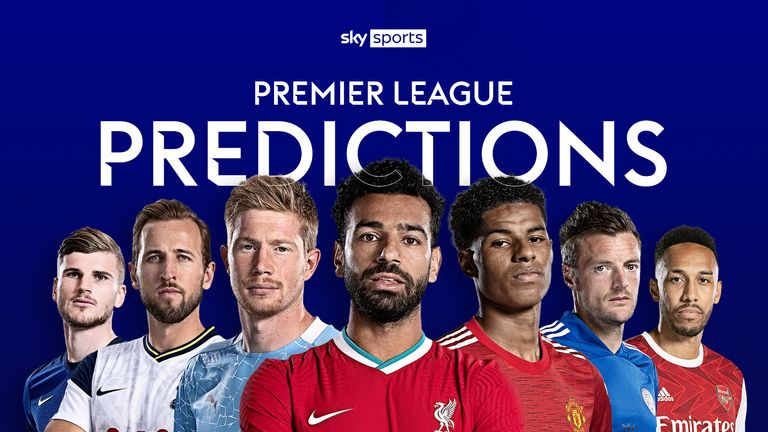

The Premier League, often referred to exonymously as the English Premier League or the EPL, is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League.
Fantasy Premier League is a virtual gaming platform where a participant forms a team of actual players playing in Premier League. The game can be simply played by signing up on the Premier League website.

## Data Definition

**name:** Name of the player

**club:** Club of the player

**age:** Age of the player

**position:** The usual position on the pitch

**position_cat:**

1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers

**market_value:** As on transfermrkt.com on July 20th, 2017

**page_views:** Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

**fpl_value:** Value in Fantasy Premier League as on July 20th, 2017

**fpl_sel:** % of FPL players who have selected that player in their team

**fpl_points:** FPL points accumulated over the previous season

**region:**

1 for England

2 for EU

3 for Americas

4 for Rest of World

**nationality:** nationality of players

**new_foreign:** Whether a new signing from a different league, for 2017/18 (till 20th July)

**age_cat**

**club_id**

**big_club:** Whether one of the Top 6 clubs

**new_signing:** Whether a new signing for 2017/18 (till 20th July)

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]

#KMeans Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#Heirchical Clustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

#PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA


<a id='Read_Data'></a>
## 2. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="pic2.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
epl = pd.read_csv('epldata_final.csv')
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


<a id='data_preparation'></a>
## 3. Data Analysis and Preparation


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
### 3.1 Understand the Dataset

<a id='Data_Shape'></a>
### 3.1.1 Data Dimension

To know the dimensions of the data:

In [81]:
# .shape returns the dimension of the data
epl.shape

(461, 17)

We see the dataframe has 17 columns and 461 observations.

<a id='Data_Types'></a>
### 4.1.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

**1. Check data types**

In [82]:
# use .dtypes to view the data type of a variable
epl.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [83]:
#transport type of fpl_selection 
epl['fpl_sel'] = epl['fpl_sel'].replace('%','',regex=True).astype('float')/100
#print(df.dtypes)
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0


In [84]:
#These countries bellow is listed as united kingdom in iso3166, thus their value have to be change
epl=epl.replace("Northern Ireland","United Kingdom")
epl=epl.replace("England","United Kingdom")
epl=epl.replace("Wales","United Kingdom")
epl=epl.replace("Scotland","United Kingdom")
epl=epl.replace("United Kingdom","United Kingdom of Great Britain and Northern Ireland")

Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 3.1.3 Summary Statistics

**1. For numerical variables, we use .describe()**

In [85]:
# describe the numerical data
epl.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,0.032443,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,0.056757,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.002000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,0.010000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,0.033000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,0.450000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


**2. For categorical features, we use .describe(include=object)**

In [86]:
epl.describe(include = object)


,name,club,position,nationality
count,461,461,461,461
unique,461,20,13,58
top,Hal Robson-Kanu,Huddersfield,CB,United Kingdom of Great Britain and Northern I...
freq,1,28,85,188


The summary statistics for categorical variables can be interpreted as:<br><br>
   count - Total number of observations<br>
   unique - Number of unique classes in a variable<br>
   top - The most repeated class
freq - Frequency of most repeated class

<a id='Missing_Values'></a>
### 4.1.4 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:

Total = epl.isnull().sum().sort_values(ascending=False) 
Percent = (epl.isnull().sum()*100/epl.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
region,1,0.21692
new_signing,0,0.00000
fpl_value,0,0.00000
club,0,0.00000
age,0,0.00000
position,0,0.00000
position_cat,0,0.00000
market_value,0,0.00000
page_views,0,0.00000
fpl_sel,0,0.00000


The missing values are present in the data for the `region` variable. There is 1 (0.216%) missing value for the variable `region`.

### Visualize Missing Values using Heatmap

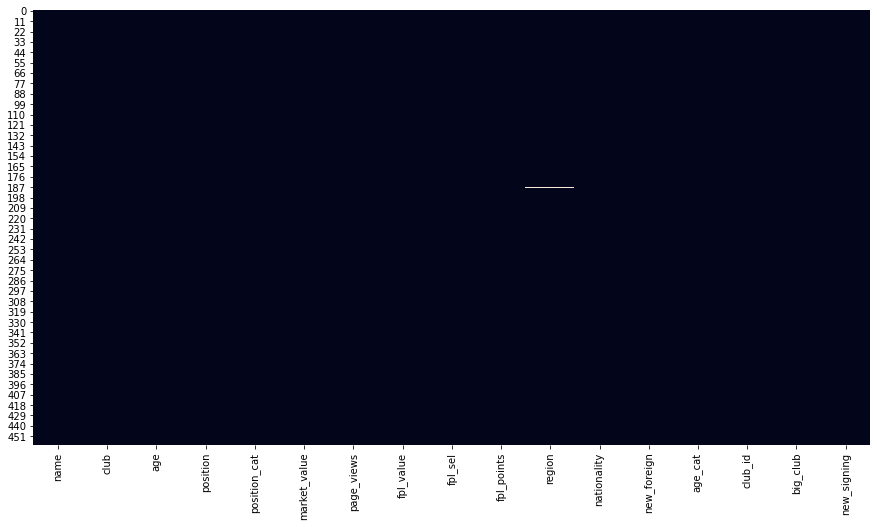

In [88]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(epl.isnull(), cbar=False)

# display the plot
plt.show()

### Deal with Missing Values


In [89]:
epl = epl.dropna()

Let's view the missing value plot once again to see if the missing values have been gone.

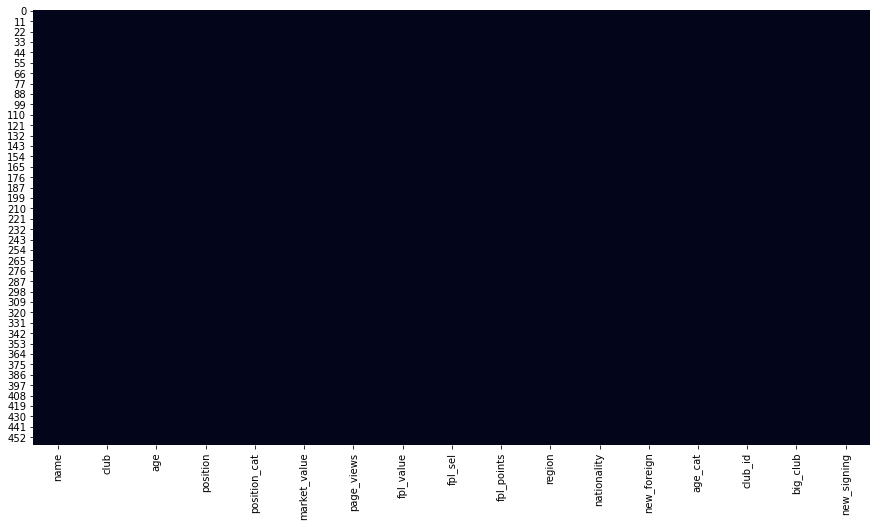

In [90]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(epl.isnull(), cbar=False)

# display the plot
plt.show()

Now, we obtain the dataset with no missing values.

<a id='correlation'></a>
### 3.1.5 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

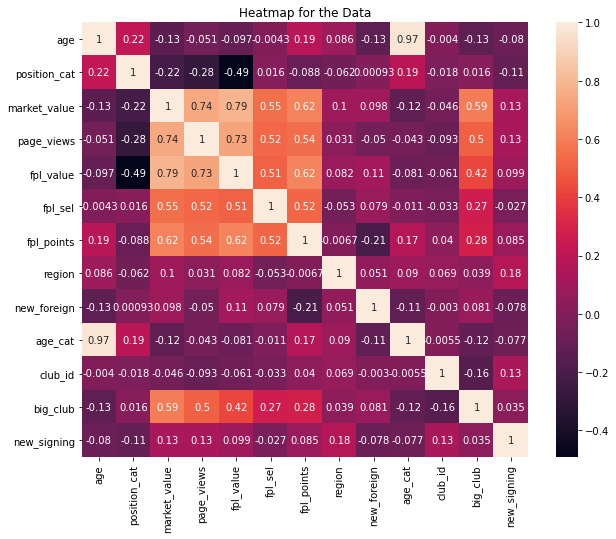

In [91]:
plt.figure(figsize = (10,8))
sns.heatmap(epl.corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data. <br>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical'></a>
### 3.1.6 Visualizing the Data


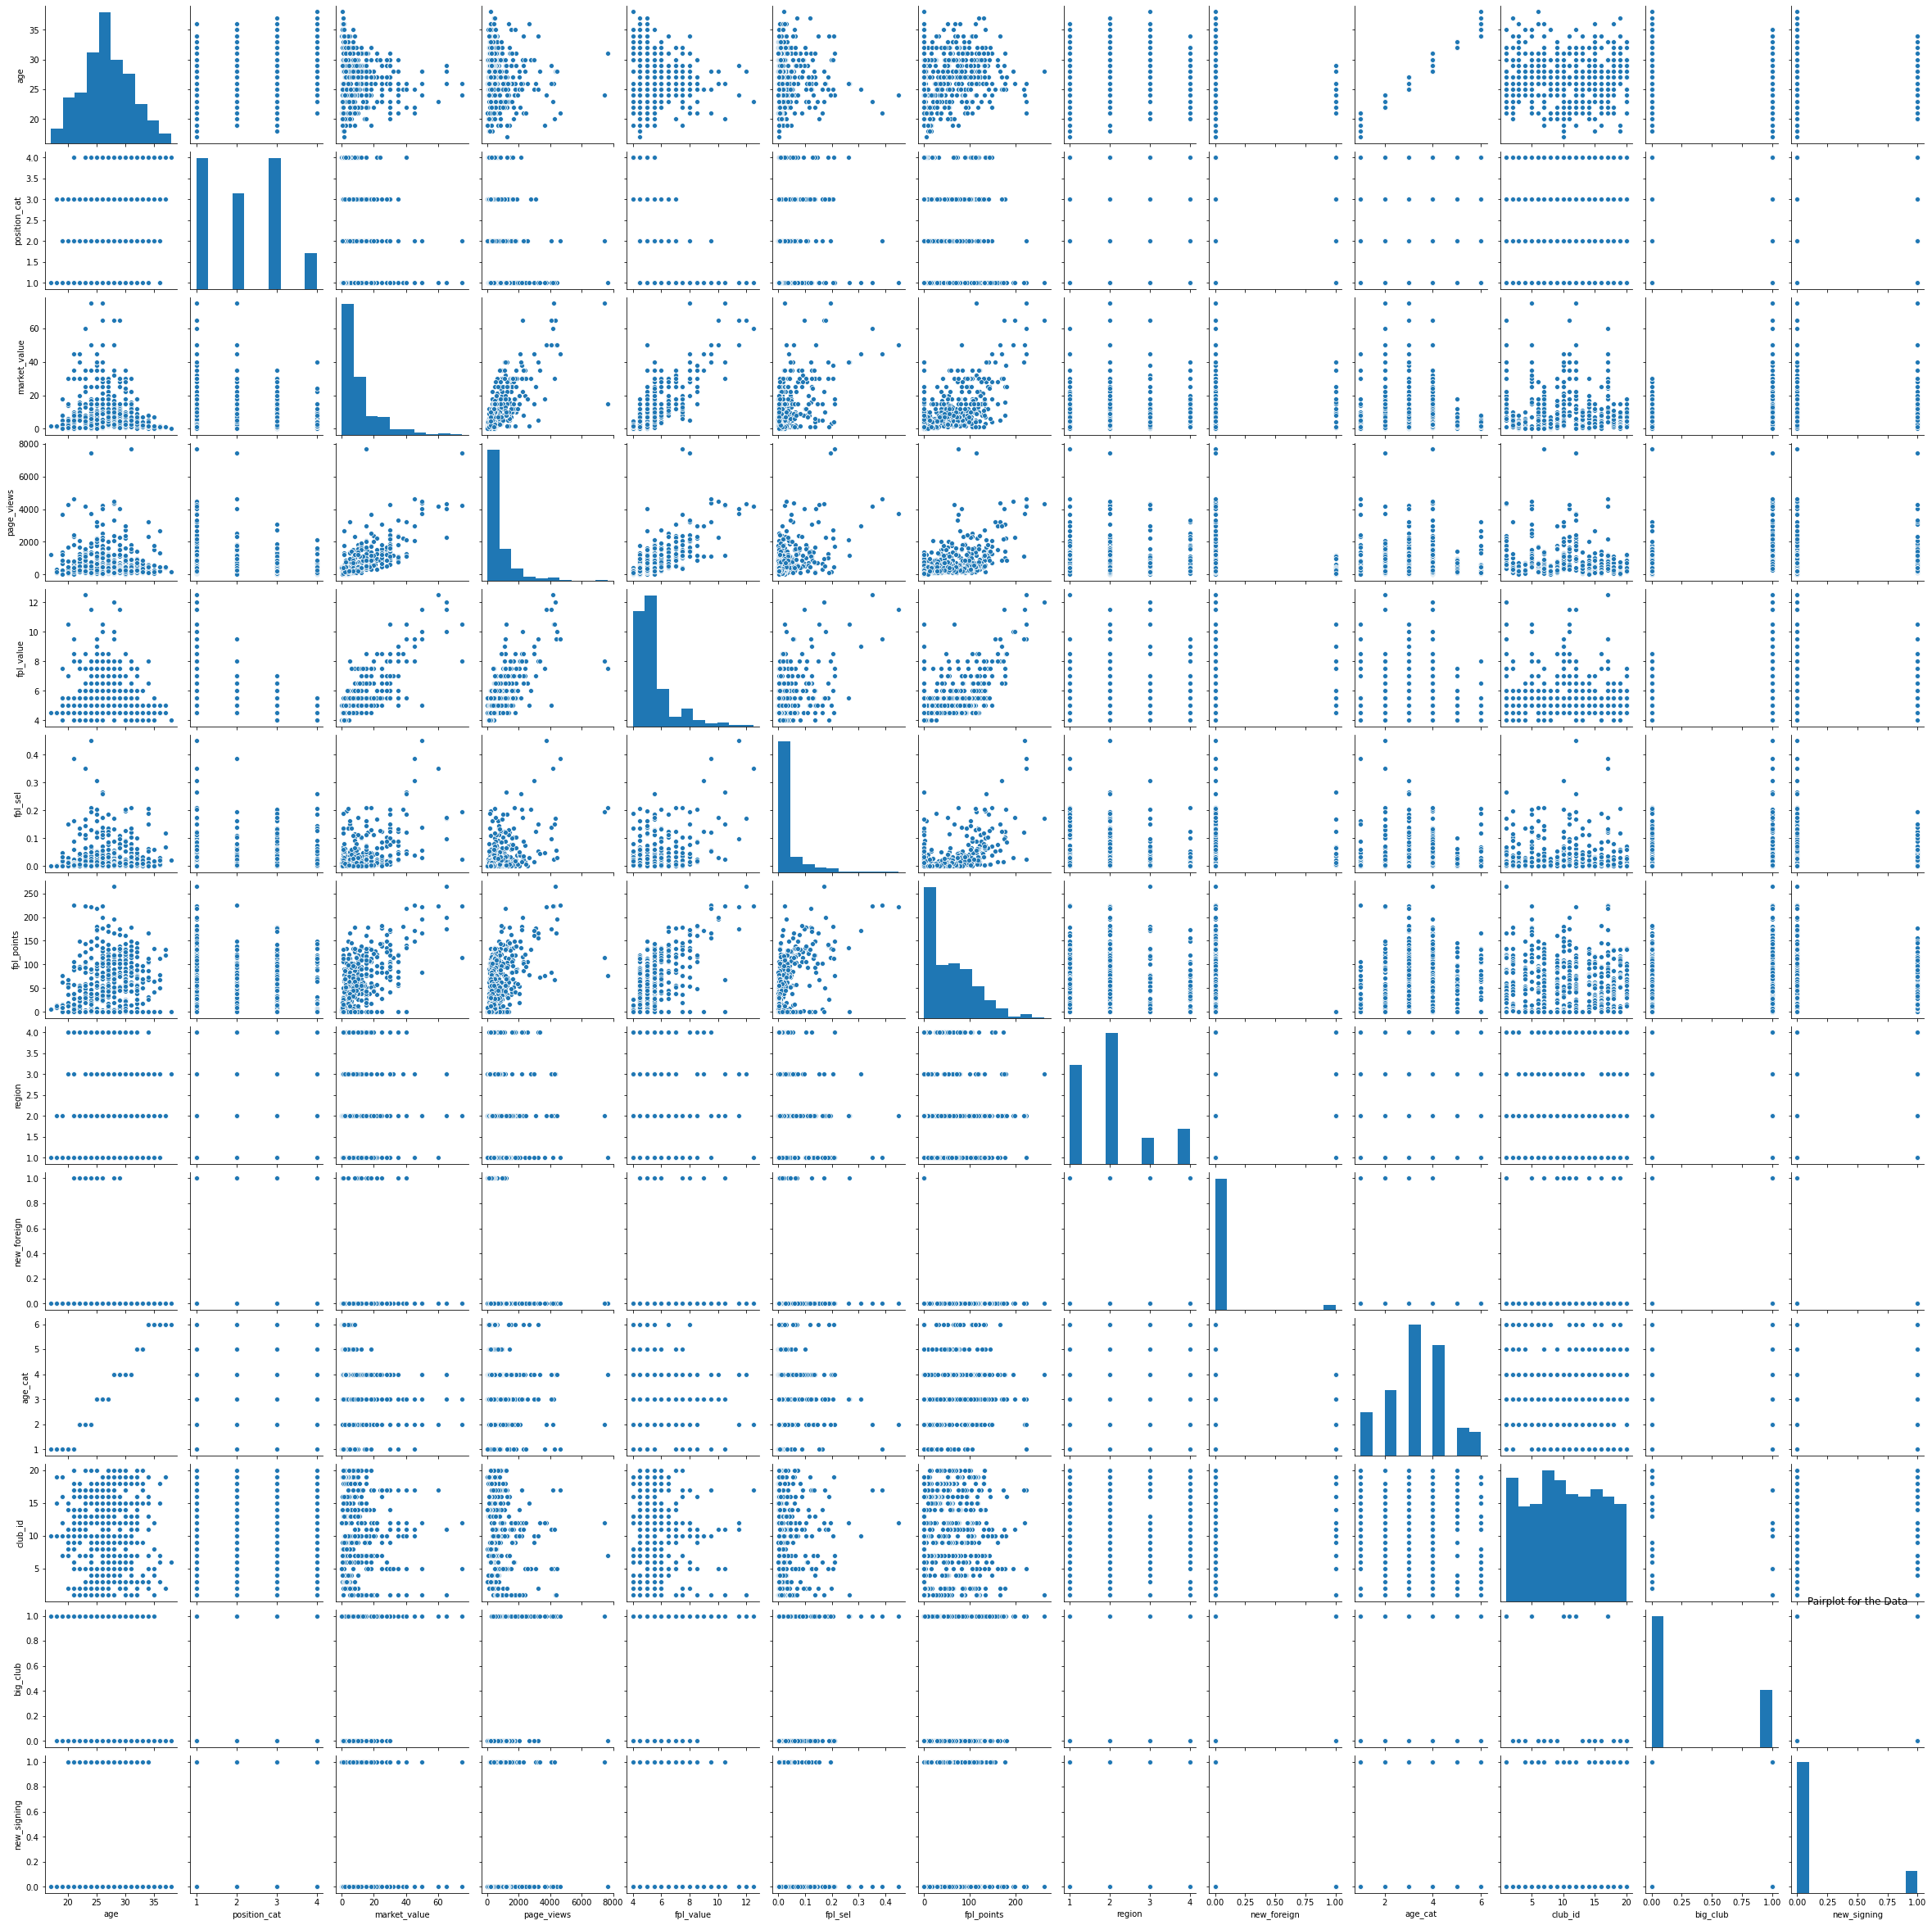

In [231]:
sns.pairplot(epl)
plt.title('Pairplot for the Data')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Number of premier league player position
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

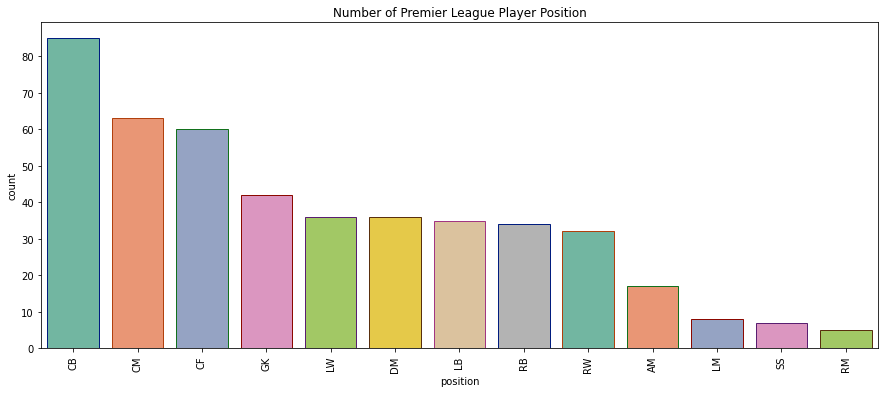

In [92]:
#number of premier league player position
plt.subplots(figsize=(15,6))
sns.countplot('position',data=epl,palette='Set2',edgecolor=sns.color_palette('dark',7),order=epl['position'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Premier League Player Position')
plt.show()

**Observation**

It appears that CB has the biggest number of players with more than 80 players in this position.I'm expecting this number, because most of the team play with at least 2 CB, and maybe they have at least 1 subtitute CB.Another point to check out is the lowest number of players. the position which has the lowes number of players is RM, with less than 10 players.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most market value
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

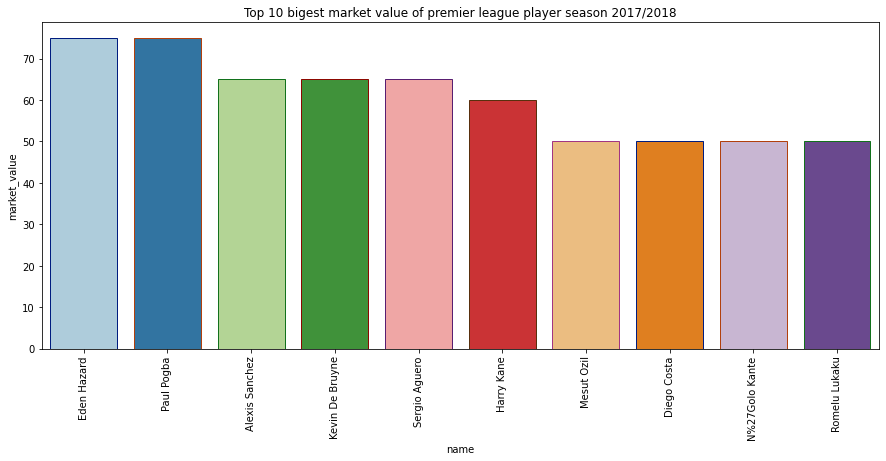

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,0.023,224,2.0,Belgium,0,3,5,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,0.195,115,2.0,France,0,2,12,1,1
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,0.175,199,2.0,Belgium,0,3,11,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,0.097,175,3.0,Argentina,0,4,11,1,0
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,0.351,224,1.0,United Kingdom of Great Britain and Northern I...,0,2,17,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,0.030,196,2.0,Spain,0,4,5,1,0
104,N%27Golo Kante,Chelsea,26,DM,2,50.0,4042,5.0,0.138,83,2.0,France,0,3,5,1,1
260,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,0.450,221,2.0,Belgium,0,2,12,1,0


In [93]:
#most market value
dfmarketv = epl.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="market_value",  data=dfmarketv,palette = 'Paired',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Top 10 bigest market value of premier league player season 2017/2018')
plt.show()
dfmarketv

**Observation**


It appears that Eden Hazard and Paul Pogba have the biggest market value, which is 75. They are followed by Alexis Sanchez on the 3rd position. As it is shown in the graph above, there are 3 Belgium players sit in this position, they are Eden Hazard, Kevin de Bruyne, and Romeru Lukaku. and the markets value top 10 position is dominated by foreign player. the only local player who is in this position is only Hary Kane.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Club with their market value average
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

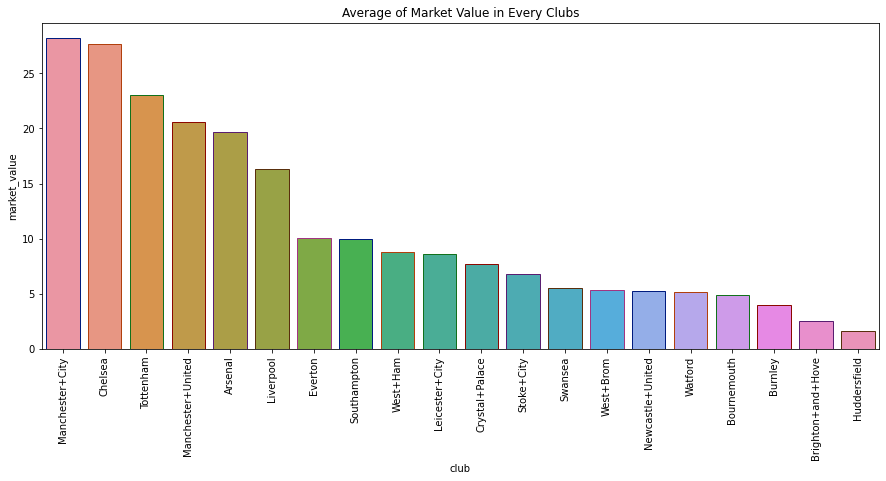

In [94]:
#club with their market value average
df_meanmv=pd.DataFrame(epl.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=df_meanmv,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value in Every Clubs')
plt.show()

**Observation**

Bar chart above shows sorted average of market value for each club. The x-axis represents clubs name while y-axis represent its average market value.It appears that ManCity and Chelsea, which are famous for spending money for a star players have the biggest average market value. They are followed by Totenham on the 3rd position. Burnley, Brighton, and Huddersfield are sitting in the lowest 3.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most view player
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

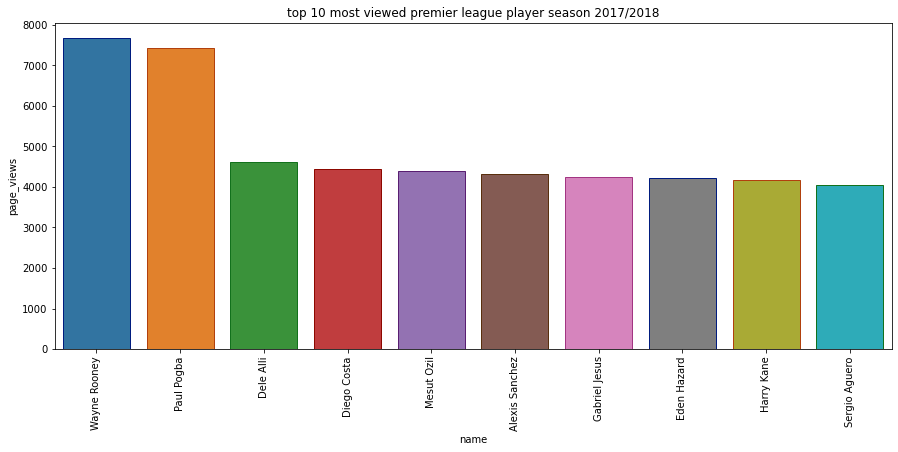

In [95]:
#most view player
dfview = epl.nlargest(10, 'page_views').sort_values('page_views',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="page_views",  data=dfview ,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 most viewed premier league player season 2017/2018')
plt.show()


**Observation**

It appears that wayne rooney has the biggest market value. He is are followed by paul pogba and on the 2nd and 3rd position. As it is shown in the graph above, there are 2 UK players sit in this position, they are Wayne Rooney and Delle Alli. Does the market value affected numbers of viewed of the players?


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Fpl 10 most valuable player
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

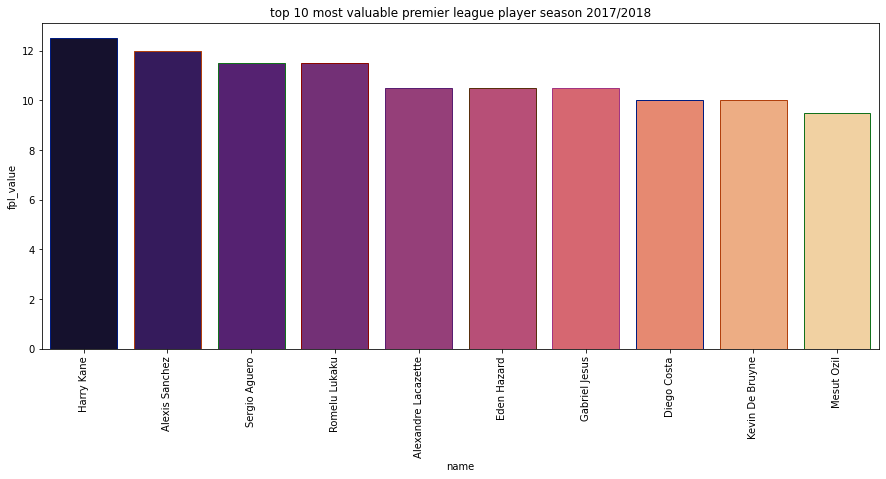

In [96]:
#fpl 10 most valuable player
dfview = epl.nlargest(10, 'fpl_value').sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="fpl_value",  data=dfview ,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 most valuable premier league player season 2017/2018')
plt.show()

**Observation**

It appears that Harry Kane ahas the biggest FPL value. He is followed by Alexis Sanchez on the 2rd position. As it is shown in the graph above, there are 3 Belgium players sit in this position, they are Eden Hazard, Kevin de Bruyne, and Romeru Lukaku. and the FPL value top 10 position is dominated by foreign player. the only local player who is in this position is only Hary Kane.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Club with their average of fpl value
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

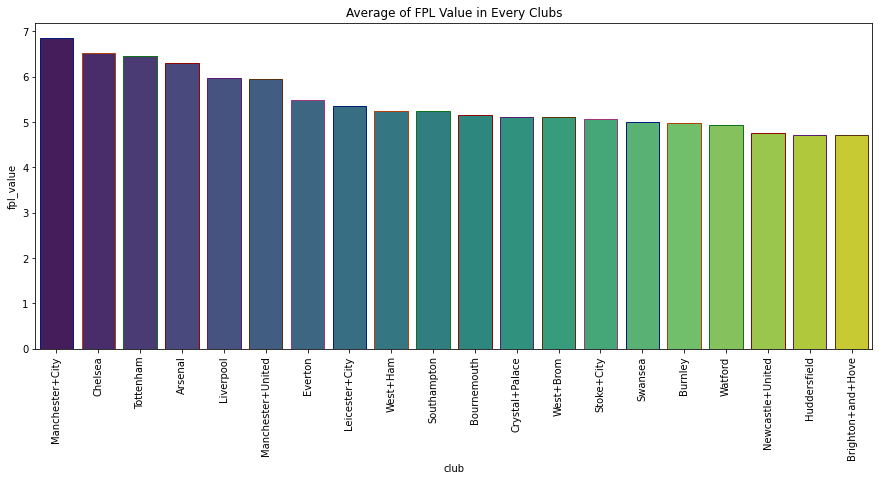

In [97]:
df_meanfv=pd.DataFrame(epl.groupby(['club'])['fpl_value'].mean()).reset_index().sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="fpl_value",data=df_meanfv,palette='viridis',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of FPL Value in Every Clubs')
plt.show()

**Observation**

Bar chart above shows sorted average of FPL value for each club. The x-axis represents clubs name while y-axis represent its average FPL value.It appears that ManCity and Chelsea have the biggest average market value. They are followed by Totenham on the 3rd position. and the 3 promoted clubs are sitting in the lowest 3.

<a id='Data_Preparation'></a>
## 4 Prepare the Data for clustering technique

In [98]:
#data prepration for the clustring Analysis
dt1=epl.iloc[:,4:10]
dt1.head()


,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points
0,1,65.0,4329,12.0,0.171,264
1,1,50.0,4395,9.5,0.056,167
2,4,7.0,1529,5.5,0.059,134
3,1,20.0,2393,7.5,0.015,122
4,3,22.0,912,6.0,0.007,121


In [99]:
# Normalizing  the data
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=dt1.apply(scale,axis=0)
data_scaled.head()

,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points
0,-1.184334,4.404512,3.826899,4.867071,2.440823,3.893966
1,-1.184334,3.180492,3.897774,3.010334,0.414147,2.065378
2,1.820042,-0.328366,0.820091,0.039557,0.467017,1.443281
3,-1.184334,0.732452,1.747906,1.524945,-0.308407,1.217064
4,0.818584,0.895654,0.157519,0.410904,-0.449393,1.198213


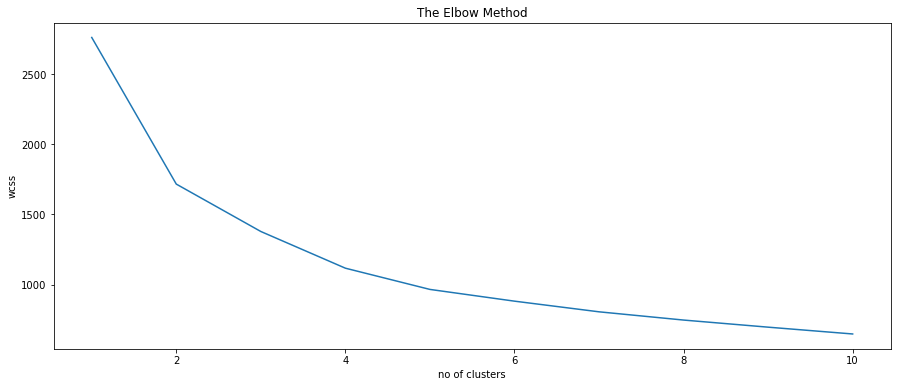

In [100]:
# finding optimal value for "K"
k=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data_scaled)
    k.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 , 6))
plt.plot(range(1,11), k)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


Here we can see that cluster =2 is giving better result as per the elbow plot.

#### Now checking Shilhoette score

In [101]:
n_clusters = [x for x in range(2,10)]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.5184857242901103)
For 3 clusters the silhouette score is 0.3605267240513767)
For 4 clusters the silhouette score is 0.2817243390800618)
For 5 clusters the silhouette score is 0.29409297635881865)
For 6 clusters the silhouette score is 0.2844580444708415)
For 7 clusters the silhouette score is 0.275913286611112)
For 8 clusters the silhouette score is 0.2789170719397207)
For 9 clusters the silhouette score is 0.28708479386304553)


So both elbow and shilhoeute is giving same result so we are fitting the Kmeans model with cluster=2

### KMeans Modeling 

In [102]:
kmeans=KMeans(n_clusters=2,random_state=200).fit(data_scaled)

In [103]:
# Cluster Summary
colmeans=dt1.mean()
std=dt1.std(axis=0)

group_mean=dt1.groupby([kmeans.labels_]).mean()

x_mean=group_mean.sub(colmeans,axis=1)

In [104]:
x_mean.divide(std,axis=1)

,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points
0,0.107103,-0.290424,-0.279098,-0.294990,-0.218898,-0.225275
1,-0.674922,1.830134,1.758758,1.858902,1.379408,1.419593


In [105]:
dat_km = pd.concat([data_scaled.reset_index().drop('index', axis=1), pd.Series(kmeans.labels_)], axis =1)
dat_km.head()

,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,0
0,-1.184334,4.404512,3.826899,4.867071,2.440823,3.893966,1
1,-1.184334,3.180492,3.897774,3.010334,0.414147,2.065378,1
2,1.820042,-0.328366,0.820091,0.039557,0.467017,1.443281,0
3,-1.184334,0.732452,1.747906,1.524945,-0.308407,1.217064,1
4,0.818584,0.895654,0.157519,0.410904,-0.449393,1.198213,0


In [106]:
dat_km.columns = ['position_cat','market_value','page_views','fpl_value','fpl_sel','fpl_points', 'Clust_id']
dat_km.head()

,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,Clust_id
0,-1.184334,4.404512,3.826899,4.867071,2.440823,3.893966,1
1,-1.184334,3.180492,3.897774,3.010334,0.414147,2.065378,1
2,1.820042,-0.328366,0.820091,0.039557,0.467017,1.443281,0
3,-1.184334,0.732452,1.747906,1.524945,-0.308407,1.217064,1
4,0.818584,0.895654,0.157519,0.410904,-0.449393,1.198213,0


In [107]:
# Check the count of observation per cluster
dat_km['Clust_id'].value_counts()

0    397
1     63
Name: Clust_id, dtype: int64

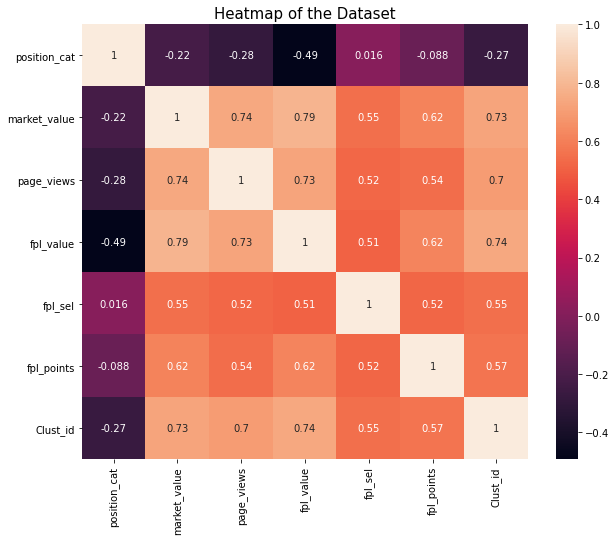

In [108]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(dat_km.corr(), annot = True)
plt.title('Heatmap of the Dataset', fontsize = 15)
plt.show()

In [109]:
# Checking scatter plot to see the distribution of data in clusters

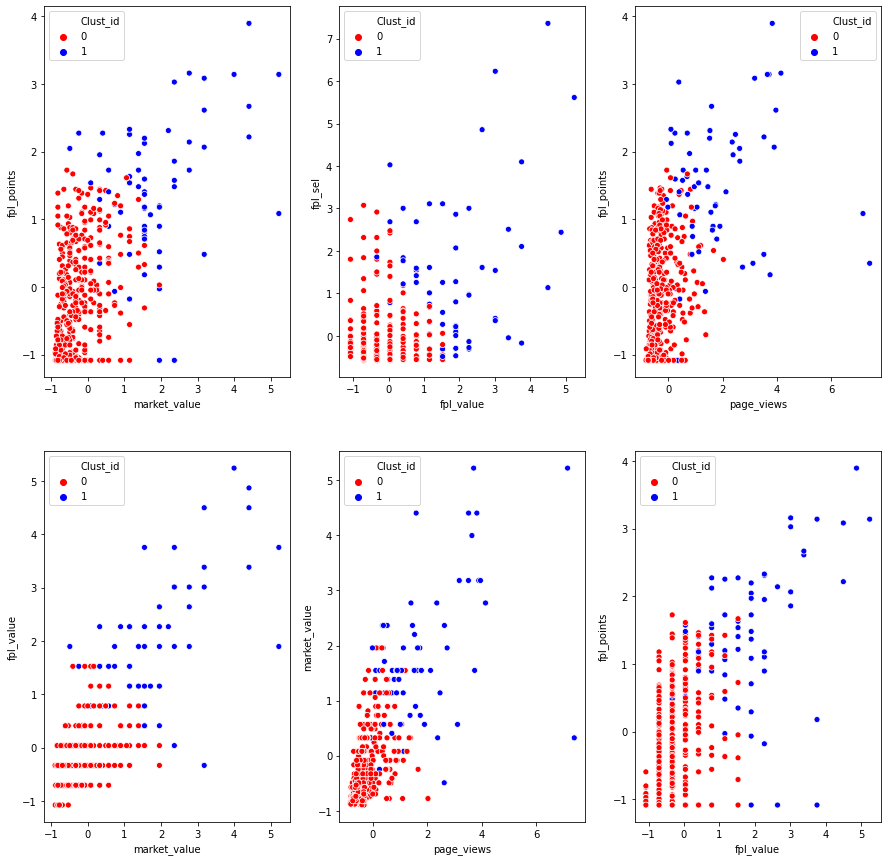

In [110]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.scatterplot(x='market_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,2)
sns.scatterplot(x='fpl_value', y ='fpl_sel', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,3)
sns.scatterplot(x='page_views', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,4)
sns.scatterplot(x='market_value', y ='fpl_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,5)
sns.scatterplot(x='page_views', y ='market_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,6)
sns.scatterplot(x='fpl_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)

Here you can see the distribution of data in both clusters

## Agglomerative Clustering

In [35]:
## Finding best linkage

In [38]:
Z1 = linkage(data_scaled, 'single')
c1, coph_dists = cophenet(Z1 , pdist(data_scaled))

Z2 = linkage(data_scaled, 'complete')
c2, coph_dists = cophenet(Z2 , pdist(data_scaled))

Z3 = linkage(data_scaled, 'average')
c3, coph_dists = cophenet(Z3 , pdist(data_scaled))

d={'Single':c1,'complete':c2,'average':c3}
d

{'Single': 0.7980752129934421,
 'complete': 0.7997720909246162,
 'average': 0.8848943320291608}

## Dendogram 

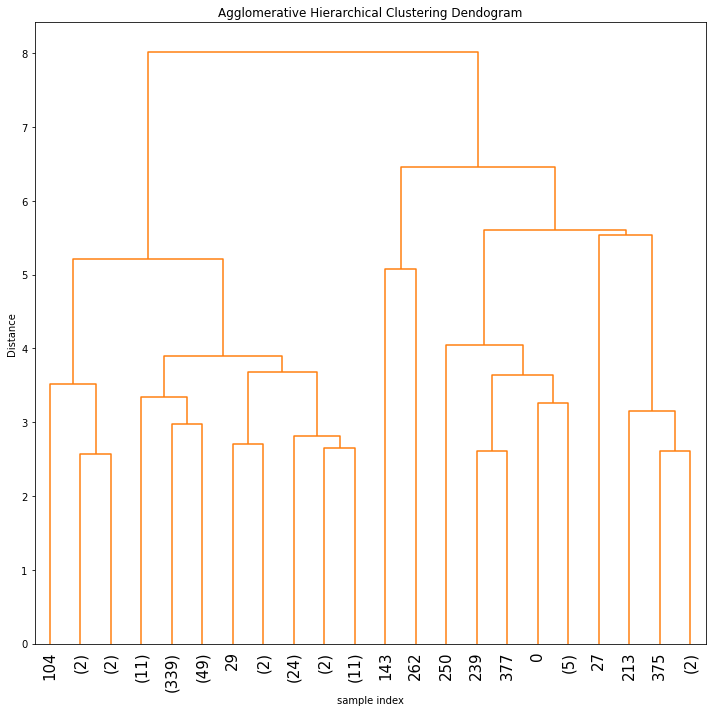

In [39]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data_scaled, 'average')
dendrogram(Z , truncate_mode ='lastp', p=22, leaf_rotation=90.,color_threshold = 30, leaf_font_size=15)
plt.tight_layout()

##### from the dendogram above it's visible that we should take number of clusters as 2 

In [40]:
## fitting the Agglomerative Clustering model

In [41]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster2 = agg.fit_predict(data_scaled)

dat_km['Clust_id'] = cluster2

In [42]:
## Checking the clusters 

In [43]:
dat_km['Clust_id'].value_counts()

1    444
0     16
Name: Clust_id, dtype: int64

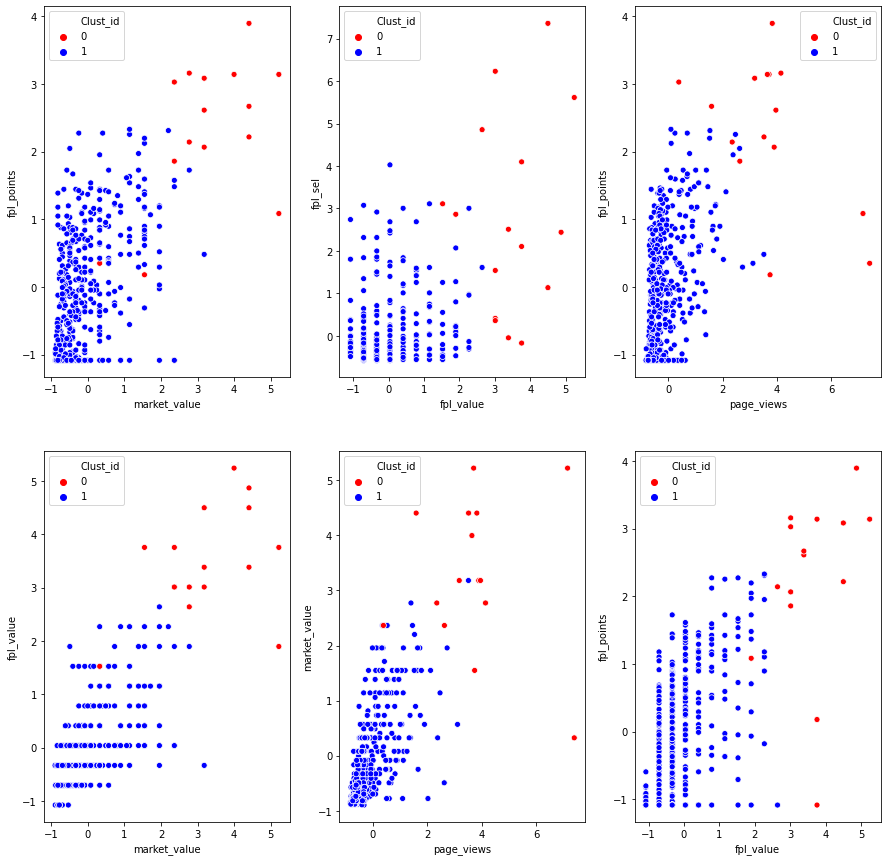

In [44]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.scatterplot(x='market_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,2)
sns.scatterplot(x='fpl_value', y ='fpl_sel', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,3)
sns.scatterplot(x='page_views', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,4)
sns.scatterplot(x='market_value', y ='fpl_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,5)
sns.scatterplot(x='page_views', y ='market_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)
plt.subplot(2,3,6)
sns.scatterplot(x='fpl_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = dat_km)

# 5 PCA

In [45]:
epl_new = epl.copy()
epl_new.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,United Kingdom of Great Britain and Northern I...,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0


In [46]:
epl_new=epl_new.set_index('name')

### Preparing data for PCA

In [47]:
epl_new.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
name,,,,,,,,,,,,,,,,
Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0
Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,United Kingdom of Great Britain and Northern I...,0,4,1,1,0
Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0


In [48]:
epl_new= epl_new.drop(['nationality','club','position'],axis=1)

In [49]:
mn=StandardScaler()
XC= mn.fit_transform(epl_new)

In [50]:
X = pd.DataFrame(XC, columns = epl_new.columns)

In [51]:
pcdf= pd.DataFrame(X)
pcdf.shape

(460, 13)

In [54]:
mypca=PCA()
pcd=mypca.fit_transform(pcdf)

In [55]:
cvar=np.cumsum(mypca.explained_variance_ratio_)

In [56]:
cvar

array([0.30099292, 0.46744152, 0.57127356, 0.65746106, 0.73579881,
       0.81146751, 0.86791895, 0.91920082, 0.95019054, 0.97286347,
       0.98743177, 0.99792761, 1.        ])

In [57]:
## Taking 95% of explained variance

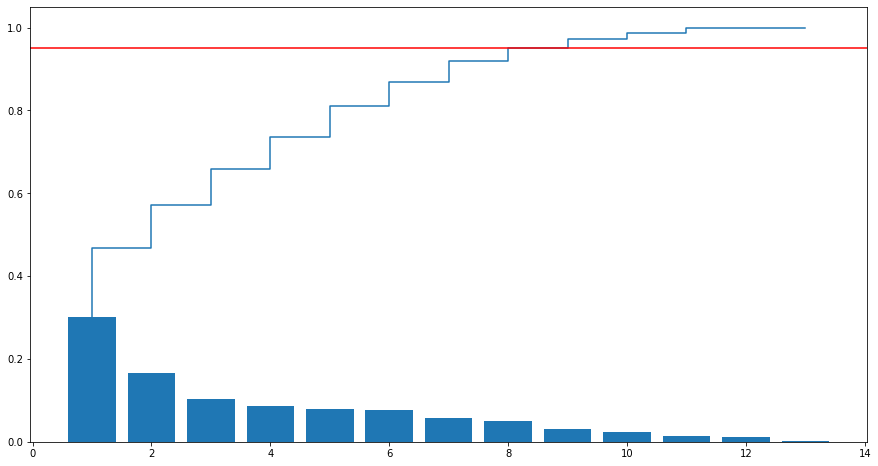

In [58]:
plt.step(range(1,14),cvar)
plt.bar(range(1,14),mypca.explained_variance_ratio_)
plt.axhline(y=0.95,c='r')

Here you can see that 8 components are containing around 95% of variance of the data.

In [59]:
#converting data into 9 components
mypca=PCA(n_components=9)
pcd=mypca.fit_transform(X)

In [60]:
pcdf= pd.DataFrame(pcd)
pcdf.shape

(460, 9)

In [61]:
pcdf= pd.DataFrame(pcd)
pcdf.shape

(460, 9)

In [62]:
### checking clustering for PCA

In [63]:
wcss  = []


for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(pcdf)
    wcss.append(kmeans.inertia_)

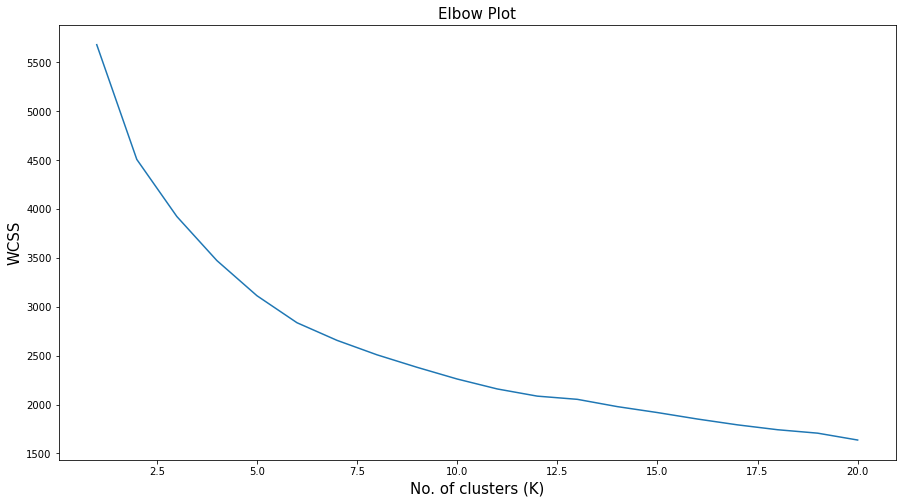

In [64]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

Here no visible bend so we will try shilhoute score method to determine number of clusters that we can use in our algorithm.

In [65]:
# create a list for different values of K
n_clusters = [x for x in range(2,10)]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(pcdf)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.2866287898464035)
For 3 clusters the silhouette score is 0.1422517884900849)
For 4 clusters the silhouette score is 0.16358016885042026)
For 5 clusters the silhouette score is 0.18021463243555386)
For 6 clusters the silhouette score is 0.18315877246804635)
For 7 clusters the silhouette score is 0.14810761893152732)
For 8 clusters the silhouette score is 0.1474696280940088)
For 9 clusters the silhouette score is 0.14768626603515483)


Chosing number of cluster = 2 as it's giving best score.

In [66]:
kmeans=KMeans(n_clusters=2,random_state=100).fit(pcdf)

In [67]:
epl_new['Clust_id']=kmeans.labels_

In [68]:
epl_new['Clust_id'].value_counts()

1    371
0     89
Name: Clust_id, dtype: int64

Data has been dividing into three clusters here 

### Cluster Analysis 

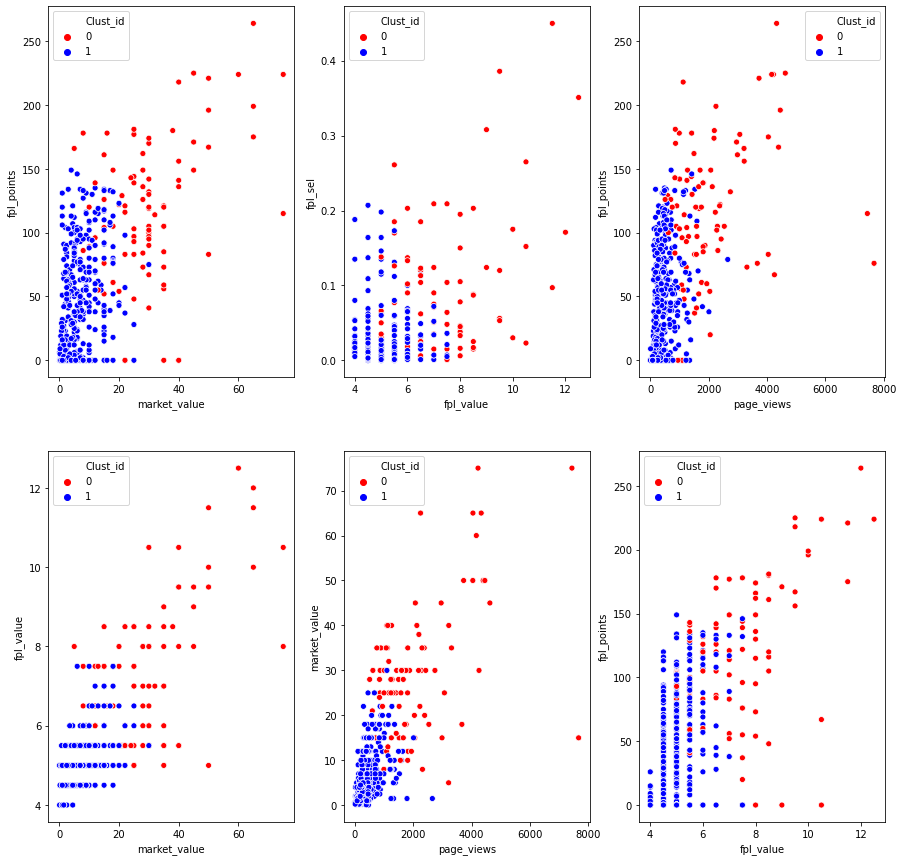

In [69]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.scatterplot(x='market_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)
plt.subplot(2,3,2)
sns.scatterplot(x='fpl_value', y ='fpl_sel', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)
plt.subplot(2,3,3)
sns.scatterplot(x='page_views', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)
plt.subplot(2,3,4)
sns.scatterplot(x='market_value', y ='fpl_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)
plt.subplot(2,3,5)
sns.scatterplot(x='page_views', y ='market_value', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)
plt.subplot(2,3,6)
sns.scatterplot(x='fpl_value', y ='fpl_points', hue = 'Clust_id', legend='full', palette= ['red', 'blue'], data = epl_new)

**Interpretation**

In these scatter plots it is visible that PCA is getting somewhat similar result as scaled data. But still some data points are not properly clustered. 

`So it is clear that using PCA in clustering method is not giving best result here. Therefore we will gonna stick with our previous result`.

## Classification 

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifier 

In [111]:
rc=DecisionTreeClassifier()

In [112]:
y=dat_km.Clust_id
X=dat_km.drop('Clust_id',axis=1)

In [113]:
xtrain, xtest, ytrain,ytest=train_test_split(X,y, test_size = 0.2, random_state = 100)

In [114]:
rc.fit(xtrain,ytrain)

y_pred_dt = rc.predict(xtest)

In [115]:
rc.fit(xtrain,ytrain)

y_pred_dt = rc.predict(xtest)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [117]:
accuracy_score(ytest,y_pred_dt)

0.967391304347826

In [118]:
print(classification_report(ytest,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.82      0.90      0.86        10

    accuracy                           0.97        92
   macro avg       0.90      0.94      0.92        92
weighted avg       0.97      0.97      0.97        92



### Random forrest

In [119]:
rf=RandomForestClassifier()

In [120]:
rf.fit(xtrain,ytrain)

y_pred_dt = rf.predict(xtest)

In [121]:
accuracy_score(ytest,y_pred_dt)

0.9891304347826086

In [122]:
print(classification_report(ytest,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.90      0.95        10

    accuracy                           0.99        92
   macro avg       0.99      0.95      0.97        92
weighted avg       0.99      0.99      0.99        92



 `Here it's visible that both algorithm are giving very good efficiency around 96%`.

##                                                                                         Recommendation system 

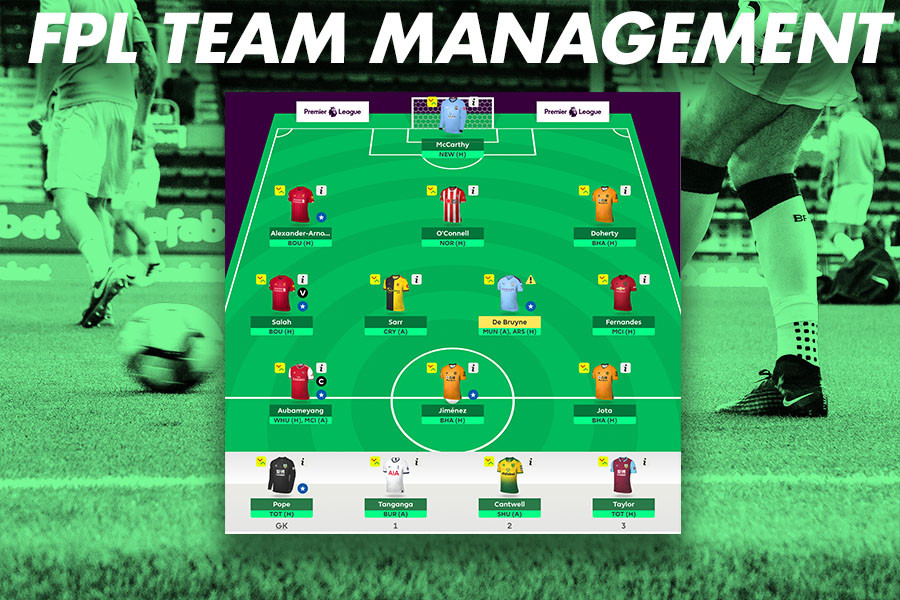

In [129]:
Image(filename='pic2 (2).jpg')

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [131]:
sample = epl.select_dtypes(include='number')
print(sample.head())

   age  position_cat  market_value  page_views  fpl_value  fpl_sel  \
0   28             1          65.0        4329       12.0    0.171   
1   28             1          50.0        4395        9.5    0.056   
2   35             4           7.0        1529        5.5    0.059   
3   28             1          20.0        2393        7.5    0.015   
4   31             3          22.0         912        6.0    0.007   

   fpl_points  region  new_foreign  age_cat  club_id  big_club  new_signing  
0         264     3.0            0        4        1         1            0  
1         167     2.0            0        4        1         1            0  
2         134     2.0            0        6        1         1            0  
3         122     1.0            0        4        1         1            0  
4         121     2.0            0        4        1         1            0  


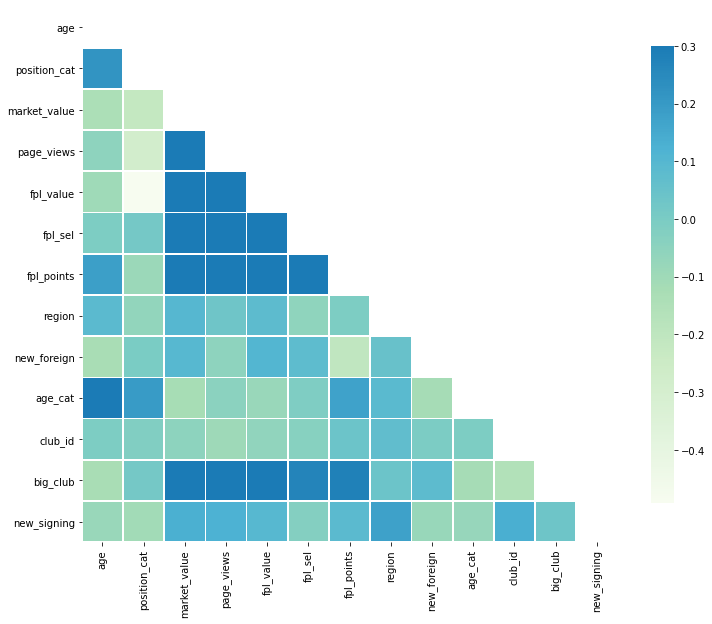

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))

# Compute the correlation matrix
corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="GnBu", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

In [133]:
scaled = StandardScaler()
X = scaled.fit_transform(sample)
recommendations = NearestNeighbors(n_neighbors=6,algorithm='kd_tree')
recommendations.fit(X)
player_index = recommendations.kneighbors(X)[1]

In [134]:
# Define a function to get Player's Index
def get_index(x):
    return epl[epl['name']==x].index.tolist()[0]

# Fetch 5 indexes of similar players
def recommend_similar(player):
    print("These are 5 players similar to {} : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print("Name: {}\nFPl points: {}\nMarket Value: €{}\nAge: {}\nClub: {}\n".format(epl.iloc[i]['name'],epl.iloc[i]['fpl_points'], epl.iloc[i]['market_value'], epl.iloc[i]['age'], epl.iloc[i]['club']))

In [135]:
recommend_similar('Laurent Koscielny')

These are 5 players similar to Laurent Koscielny : 
Name: Nacho Monreal
FPl points: 115
Market Value: €13.0
Age: 31
Club: Arsenal

Name: Dejan Lovren
FPl points: 106
Market Value: €17.0
Age: 28
Club: Liverpool

Name: Nemanja Matic
FPl points: 105
Market Value: €35.0
Age: 28
Club: Chelsea

Name: Aleksandar Kolarov
FPl points: 95
Market Value: €10.0
Age: 31
Club: Manchester+City

Name: Simon Mignolet
FPl points: 110
Market Value: €12.0
Age: 29
Club: Liverpool



In [136]:
recommend_similar('Paul Pogba')

These are 5 players similar to Paul Pogba : 
Name: Victor Wanyama
FPl points: 103
Market Value: €25.0
Age: 26
Club: Tottenham

Name: Joel Matip
FPl points: 97
Market Value: €25.0
Age: 25
Club: Liverpool

Name: Georginio Wijnaldum
FPl points: 149
Market Value: €28.0
Age: 26
Club: Liverpool

Name: Shkodran Mustafi
FPl points: 90
Market Value: €30.0
Age: 25
Club: Arsenal

Name: Ilkay Gundogan
FPl points: 41
Market Value: €30.0
Age: 26
Club: Manchester+City



### Recommendation using matrix decomposition

In [137]:
epl_matrix = epl.pivot_table(values='fpl_sel', index='position', columns='name', fill_value=0)
epl_matrix.head()

name,Aaron Cresswell,Aaron Lennon,Aaron Mooy,Aaron Ramsey,Abdoulaye Doucoure,Adam Federici,Adam Lallana,Adam Smith,Ademola Lookman,Adrian,...,Winston Reid,Xherdan Shaqiri,Yannick Bolasie,Yaya Toure,Yohan Benalouane,Yohan Cabaye,YounÃ¨s Kaboul,Ã‰tienne Capoue,Ã€ngel Rangel,Åukasz FabiaÅ„ski
position,,,,,,,,,,,,,,,,,,,,,
AM,0.0,0.0,0.000,0.000,0,0.0,0.064,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,0.0,0.0
CB,0.0,0.0,0.000,0.000,0,0.0,0.000,0.0,0.0,0.0,...,0.004,0.0,0.0,0.000,0.001,0.000,0.001,0.00,0.0,0.0
CF,0.0,0.0,0.000,0.000,0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,0.0,0.0
CM,0.0,0.0,0.025,0.051,0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.025,0.000,0.014,0.000,0.00,0.0,0.0
DM,0.0,0.0,0.000,0.000,0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.08,0.0,0.0


In [138]:
X = epl_matrix.T
X.head()

position,AM,CB,CF,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
name,,,,,,,,,,,,,
Aaron Cresswell,0.0,0.0,0.0,0.000,0.0,0.0,0.013,0.0,0.0,0.0,0.0,0.000,0.0
Aaron Lennon,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.002,0.0
Aaron Mooy,0.0,0.0,0.0,0.025,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
Aaron Ramsey,0.0,0.0,0.0,0.051,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
Abdoulaye Doucoure,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0


In [140]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=12)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(460, 12)

In [141]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(460, 460)

In [142]:
X.index[70]

'Chris Smalling'

In [143]:
i = "Harry Kane"

player_names = list(X.index)
player_ID = player_names.index(i)
player_ID

156

In [144]:
correlation_player_ID = correlation_matrix[player_ID]
correlation_player_ID.shape

(460,)

In [145]:
Recommend = list(X.index[correlation_player_ID > 0.65])

# Removes the player already selected by the customer
Recommend.remove(i) 

Recommend[0:10]

['Ahmed Musa',
 'Aleksandar Mitrovic',
 'Alexandre Lacazette',
 'Andre Gray',
 'Andy Carroll',
 'Anthony Martial',
 'Ashley Barnes',
 'Ashley Fletcher',
 'Benik Afobe',
 'Callum Wilson']

Here based on player selection by user it's giving us 10 recomandations.

### Conclusion  

As a future work, we suggest to:

Try more different features about either team, or player performance history.
Include more information about player injury state.
Add features about match importance to each team, and which team is the home team and which one is the away team.
Use more seasons data in training can improve the model performance.

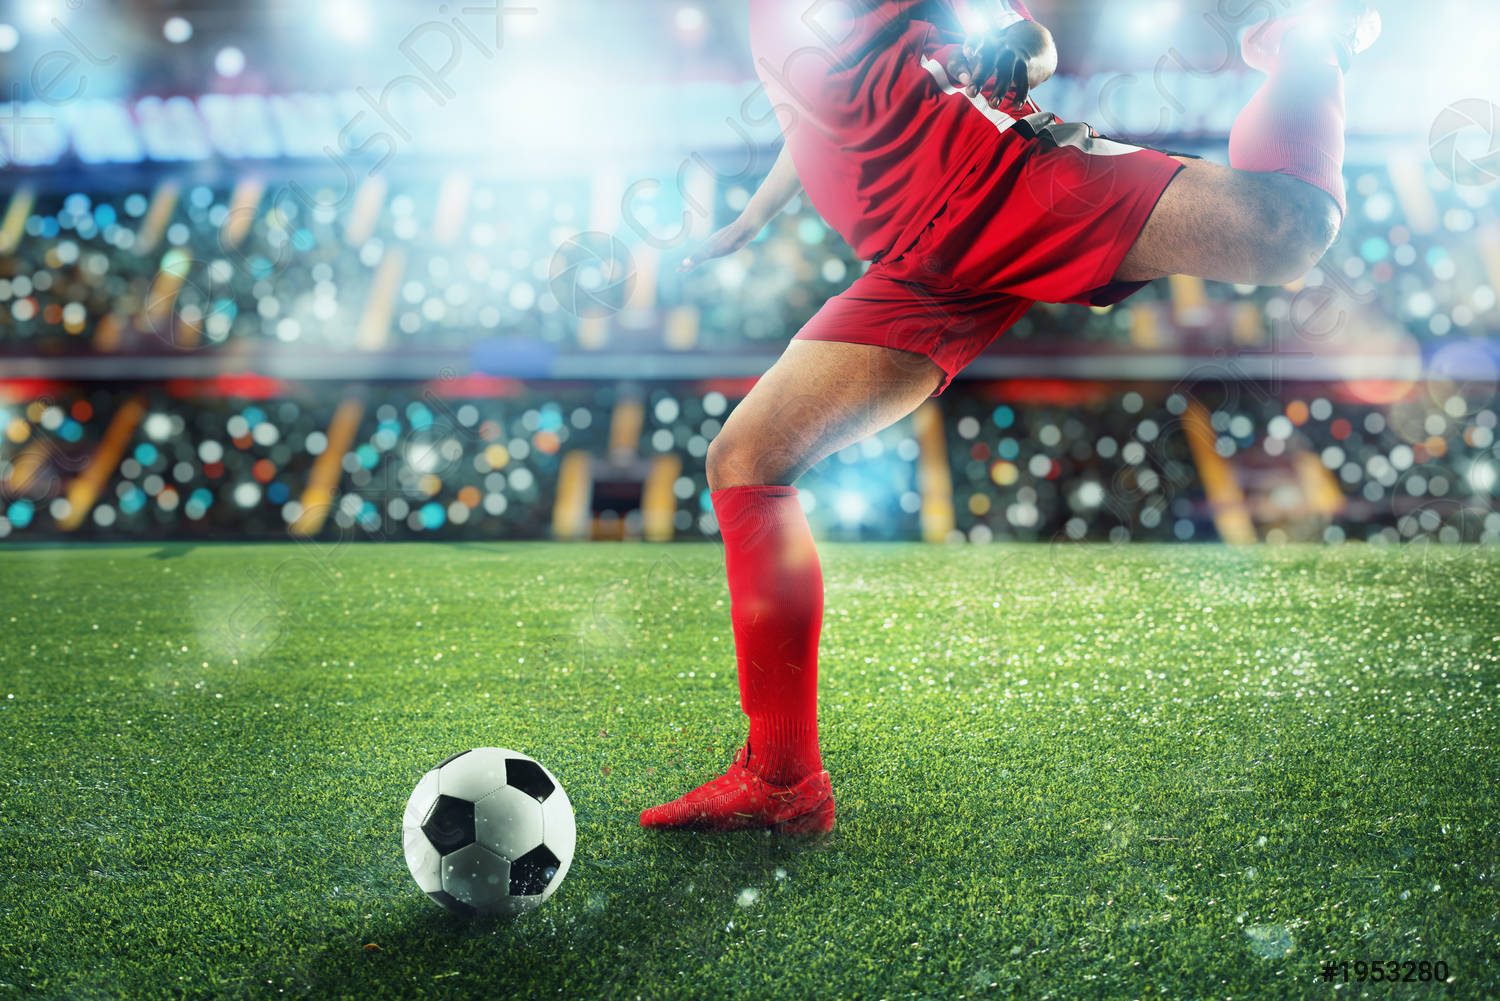

In [128]:
Image("pic2 (1).jpg")